In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('data-tanaman-padi-lengkap.csv')

In [4]:
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
275,Bangka Belitung,2016,20199.46,11726.10,1936.7,76.50,27.74
276,Bangka Belitung,2017,28974.54,15275.46,2068.1,75.12,27.50
277,Bangka Belitung,2018,18951.00,8618.00,1889.8,72.24,27.97
278,Bangka Belitung,2019,57324.00,17841.00,2182.5,81.12,26.03


In [5]:
class NeuralNetwork:
    def __init__(self, input_size=4, hidden_size1=4, hidden_size2=4, output_size=1):
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.hidden_size2 = hidden_size2
        self.output_size = output_size
        
        # Inisialisasi bobot dan bias secara acak
        np.random.seed(42)
        self.weights_input_hidden1 = np.random.rand(self.input_size, self.hidden_size1)
        self.bias_hidden1 = np.random.rand(self.hidden_size1)

        self.weights_hidden1_hidden2 = np.random.rand(self.hidden_size1, self.hidden_size2)
        self.bias_hidden2 = np.random.rand(self.hidden_size2)

        self.weights_hidden2_output = np.random.rand(self.hidden_size2, self.output_size)
        self.bias_output = np.random.rand(self.output_size)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, input_data):
        self.hidden_layer1_input = np.dot(input_data, self.weights_input_hidden1) + self.bias_hidden1
        self.hidden_layer1_output = self.sigmoid(self.hidden_layer1_input)

        self.hidden_layer2_input = np.dot(self.hidden_layer1_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.hidden_layer2_output = self.sigmoid(self.hidden_layer2_input)

        self.output_layer_input = np.dot(self.hidden_layer2_output, self.weights_hidden2_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_layer_input)
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def backward(self, input_data, output_data, learning_rate):
        error = output_data - self.predicted_output

        d_predicted_output = error * self.sigmoid_derivative(self.predicted_output)

        error_hidden_layer2 = d_predicted_output.dot(self.weights_hidden2_output.T)
        d_hidden_layer2 = error_hidden_layer2 * self.sigmoid_derivative(self.hidden_layer2_output)

        error_hidden_layer1 = d_hidden_layer2.dot(self.weights_hidden1_hidden2.T)
        d_hidden_layer1 = error_hidden_layer1 * self.sigmoid_derivative(self.hidden_layer1_output)

        self.weights_hidden2_output += self.hidden_layer2_output.T.dot(d_predicted_output) * learning_rate
        self.bias_output += np.sum(d_predicted_output) * learning_rate

        self.weights_hidden1_hidden2 += self.hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
        self.bias_hidden2 += np.sum(d_hidden_layer2) * learning_rate

        self.weights_input_hidden1 += input_data.T.dot(d_hidden_layer1) * learning_rate
        self.bias_hidden1 += np.sum(d_hidden_layer1) * learning_rate
    
    def train(self, input_data, output_data, epochs=10000, learning_rate=0.001):
        loss = []
        for epoch in range(epochs):
            self.forward(input_data)
            self.backward(input_data, output_data, learning_rate)
            mse = mean_squared_error(y_pred=self.predicted_output,y_true=output_data)
            loss.append(mse)
            # print(f"iteration - {epoch}\nMSE : {mse}\nNilai Bobot : {self.weights_input_hidden1}\nNilai Bias :{self.bias_hidden1}\n")

        return loss
            
    
    def predict(self, input_data):
        self.forward(input_data)
        return self.predicted_output


In [6]:
def normalisasi(data):
    mm = MinMaxScaler()
    mm.fit(data)
    return mm

In [7]:
def getXandY(provinsi):
    data = df.loc[df['Provinsi'] == provinsi]
    X = data[['Luas Panen','Curah hujan','Suhu rata-rata']]
    y = data[['Produksi']]
    return X,y

In [8]:
# print("====== Hasil Backward Propagation ======")
# X_all = df[['Luas Panen','Curah hujan','Suhu rata-rata']]
# y_all = df[['Produksi']]
# scalerX =  normalisasi(X_all)
# scalerY = normalisasi(y_all)
# X_scaler = scalerX.transform(X_all)
# y_scaler = scalerY.transform(y_all)
# X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_scaler,random_state=42,test_size=0.2)

# NN = NeuralNetwork(input_size=3,hidden_size1=4,hidden_size2=4,output_size=1)
# hist = NN.train(X_train,y_train,epochs=1000,learning_rate=0.1)

In [9]:
# plt.figure(figsize=(10,5))
# plt.plot(hist,label='Proses Bacward Propagation')
# plt.title("NIlai Loss MSE Selama Proses Backward")
# plt.xlabel("Iterasi")
# plt.ylabel("Nilai MSE")
# plt.legend();
# plt.savefig("proses-backward")

In [10]:
prov_ = df['Provinsi'].unique()
loss = {}
mape = {}
mse = {}
print("Mohon Menunggu ...")
hasil =  {}
for i in prov_:
    X,y = getXandY(i)
    scalerX = normalisasi(X)
    scalerY = normalisasi(y)
    X_scaler = scalerX.transform(X)
    y_scaler = scalerY.transform(y)
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_scaler,random_state=42,test_size=0.12)
    NN = NeuralNetwork(input_size=3,hidden_size1=4,hidden_size2=4,output_size=1)
    hist = NN.train(X_train,y_train,epochs=10000,learning_rate=0.1)
    p = NN.predict(X_test)
    pred = scalerY.inverse_transform(p)
    y_true = scalerY.inverse_transform(y_test)
    mape[i] = mean_absolute_percentage_error(y_pred=pred,y_true=y_true)*100
    mse[i] =  mean_squared_error(y_pred=p,y_true=y_test)
    loss[i] = hist
    hasil[i] =  np.round(pred,2)
    print(f"Data {i} sudah siap [ MSE : {mse[i]} ]")
    
print("training data sudah selesai ...")
print()

Mohon Menunggu ...
Data Aceh sudah siap [ MSE : 0.006931697767034872 ]
Data Sumatera Utara sudah siap [ MSE : 0.02514904132838155 ]
Data Sumatera Barat sudah siap [ MSE : 0.0009194554058076797 ]
Data Riau sudah siap [ MSE : 0.003628628426234701 ]
Data Jambi sudah siap [ MSE : 0.01066317794929384 ]
Data Sumatera Selatan sudah siap [ MSE : 0.011130602849494282 ]
Data Bengkulu sudah siap [ MSE : 0.18189682320976036 ]
Data Lampung sudah siap [ MSE : 0.0075790017632088634 ]
Data Kepulauan Riau sudah siap [ MSE : 0.030699620012384795 ]
Data Bangka Belitung sudah siap [ MSE : 0.07689012162670356 ]
training data sudah selesai ...



Proses Training Data :


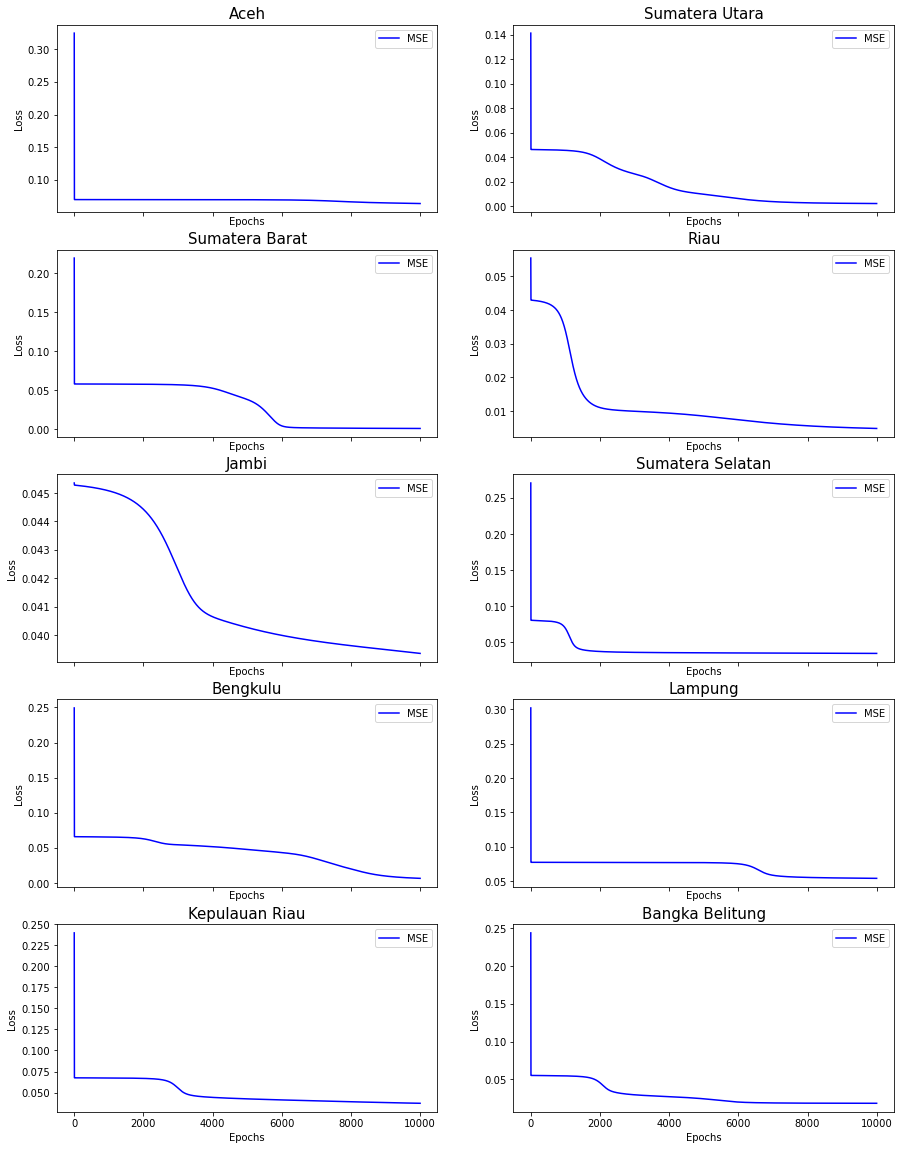

In [19]:
fig,axes = plt.subplots(5,2,figsize=(15,20),sharex=True)
axes = axes.flatten()
# cols = list(data_.keys())
# colors = ['b','g','r','c','m','y','k','g']
print("Proses Training Data :")
for i,ax in enumerate(axes):
    
    ax.plot(loss[prov_[i]],color='b',label='MSE')
    
    ax.set_title(label=prov_[i],fontsize=15)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax.legend();
plt.savefig("grafik/proses.training.png")

In [28]:
np.mean(list(mse.values()))

0.03554881703383045

# Mape

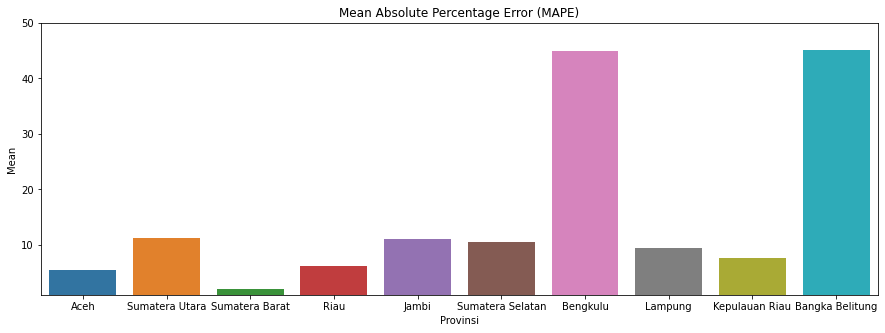

In [136]:
plt.figure(figsize=(15,5))
sns.barplot(x=prov_,y=list(mape.values()))
plt.ylabel('Mean')
plt.title("Mean Absolute Percentage Error (MAPE)")
plt.xlabel("Provinsi")
plt.ylim((1,50));

In [137]:
mape

{'Aceh': 5.533176771502232,
 'Sumatera Utara': 11.255887352005383,
 'Sumatera Barat': 2.036745274233147,
 'Riau': 6.110542429379462,
 'Jambi': 11.075463670469626,
 'Sumatera Selatan': 10.4585561622934,
 'Bengkulu': 44.950283588370546,
 'Lampung': 9.376741295034835,
 'Kepulauan Riau': 7.6501443109968505,
 'Bangka Belitung': 45.08201228898503}

# MSE

Text(0.5, 0, 'Provinsi')

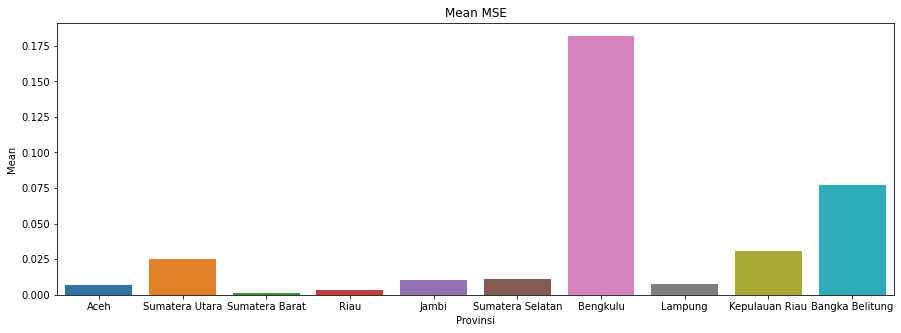

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x=prov_,y=list(mse.values()))
plt.ylabel('Mean')
plt.title("Mean MSE")
plt.xlabel("Provinsi")
# plt.ylim((0,0.10));

In [139]:
hasil = {'Provinsi':prov_,'MSE':list(mse.values()),"MAPE":list(mape.values())}

In [140]:
hasil = pd.DataFrame(hasil)
hasil

,Provinsi,MSE,MAPE
0,Aceh,0.006932,5.533177
1,Sumatera Utara,0.025149,11.255887
2,Sumatera Barat,0.000919,2.036745
3,Riau,0.003629,6.110542
4,Jambi,0.010663,11.075464
5,Sumatera Selatan,0.011131,10.458556
6,Bengkulu,0.181897,44.950284
7,Lampung,0.007579,9.376741
8,Kepulauan Riau,0.030700,7.650144
9,Bangka Belitung,0.076890,45.082012


In [141]:
print(f"Rata-rata MAPE : {round(np.mean(hasil['MAPE']),2)}%")
print(f"Rata-rata MSE : {round(np.mean(hasil['MSE']),2)}")

Rata-rata MAPE : 15.35%
Rata-rata MSE : 0.04


# Prediksi 4 Tahun Kedepan

In [14]:
hasil

{'Aceh': array([[1454813.28],
        [1608489.23],
        [1507747.86],
        [1807860.36]]),
 'Sumatera Utara': array([[3884021.43],
        [2332711.07],
        [3404764.44],
        [3912985.34]]),
 'Sumatera Barat': array([[1927395.3 ],
        [1544321.46],
        [1678814.34],
        [2501942.84]]),
 'Riau': array([[452960.04],
        [263571.08],
        [442764.7 ],
        [393514.73]]),
 'Jambi': array([[588768.42],
        [461037.74],
        [583863.77],
        [571078.98]]),
 'Sumatera Selatan': array([[2050865.32],
        [2286820.42],
        [1832557.01],
        [3526231.01]]),
 'Bengkulu': array([[476558.29],
        [595862.8 ],
        [542169.02],
        [618067.13]]),
 'Lampung': array([[2216840.72],
        [2330421.4 ],
        [2258958.88],
        [3458494.18]]),
 'Kepulauan Riau': array([[851.25],
        [853.71],
        [860.44],
        [853.36]]),
 'Bangka Belitung': array([[26143.99],
        [31845.85],
        [40459.04],
        [27767.36

In [40]:
fig = px.line(x=['2021','2022','2023','2024'], y = hasil['Sumatera Utara'].T[0], template='plotly_dark', markers=True)
fig.update_layout(title=f'Prediksi Produksi di Provinsi Sumatera Utara Dari Tahun 2021-2024',
           xaxis_title='Tahun',
           yaxis_title='Jumlah Produksi')


In [79]:
tahun = ['2021','2022','2023','2024']

tahun_2021= []
tahun_2022 = []
tahun_2023 = []
tahun_2024 = []
for i in hasil:
    tahun_2021.append(hasil[i][0])
    tahun_2022.append(hasil[i][1])
    tahun_2023.append(hasil[i][2])
    tahun_2024.append(hasil[i][3])
    
    

In [91]:
total_prediksi = {'2020':[tahun_2020],'2021':[np.sum(tahun_2021).round(2)],'2022':[np.sum(tahun_2022).round(2)],'2023':[np.sum(tahun_2023).round(2)],'2024':[np.sum(tahun_2024)]}

In [92]:
total_produksi= pd.DataFrame(total_prediksi)
total_produksi

,2020,2021,2022,2023,2024
0,11680781.08,13079218.04,11455934.76,12292959.5,16818795.29


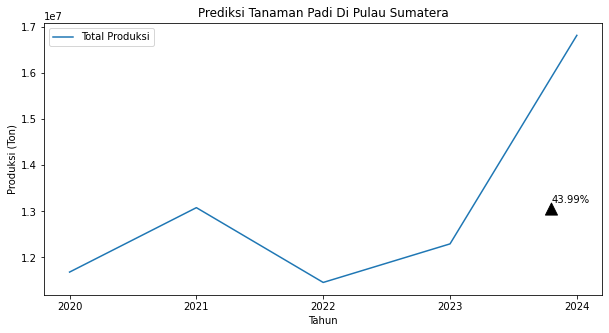

In [133]:
plt.figure(figsize=(10,5))
plt.plot(['2020','2021','2022','2023','2024'],total_produksi.values[0],label='Total Produksi')
plt.xlabel("Tahun")
plt.ylabel("Produksi (Ton)")
plt.title("Prediksi Tanaman Padi Di Pulau Sumatera")
persentase = (total_produksi.values[0][-1] -total_produksi.values[0][0]) / total_produksi.values[0][0]  * 100
plt.annotate(f"{persentase:.2f}%", (3.8, total_produksi.values[0][0]+1500000), xycoords='data',
              arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim()
plt.legend();
plt.savefig("grafik_prediksi_tanaman_padi.png")

In [47]:
hasil

{'Aceh': array([[1454813.28],
        [1608489.23],
        [1507747.86],
        [1807860.36]]),
 'Sumatera Utara': array([[3884021.43],
        [2332711.07],
        [3404764.44],
        [3912985.34]]),
 'Sumatera Barat': array([[1927395.3 ],
        [1544321.46],
        [1678814.34],
        [2501942.84]]),
 'Riau': array([[452960.04],
        [263571.08],
        [442764.7 ],
        [393514.73]]),
 'Jambi': array([[588768.42],
        [461037.74],
        [583863.77],
        [571078.98]]),
 'Sumatera Selatan': array([[2050865.32],
        [2286820.42],
        [1832557.01],
        [3526231.01]]),
 'Bengkulu': array([[476558.29],
        [595862.8 ],
        [542169.02],
        [618067.13]]),
 'Lampung': array([[2216840.72],
        [2330421.4 ],
        [2258958.88],
        [3458494.18]]),
 'Kepulauan Riau': array([[851.25],
        [853.71],
        [860.44],
        [853.36]]),
 'Bangka Belitung': array([[26143.99],
        [31845.85],
        [40459.04],
        [27767.36

In [63]:
def cek_kenaikan_penurunan(arr):
    arr = np.array(arr)
    if np.all(np.diff(arr) > 0):
        return "Kenaikan"
    elif np.all(np.diff(arr) < 0):
        return "Penurunan"
    else:
        return "Tidak ada perubahan"

In [72]:
hasil.keys()

dict_keys(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Riau', 'Bangka Belitung'])

In [67]:
def cek_perubahan_dengan_persentase(arr, persentase):
    arr = np.array(arr)
    diff = np.diff(arr)
    perubahan_persentase = (diff / arr[:-1]) * 100
    if np.all(perubahan_persentase >= persentase):
        return f"Kenaikan lebih dari {persentase}%"
    elif np.all(perubahan_persentase <= -persentase):
        return f"Penurunan lebih dari {persentase}%"
    else:
        return "Tidak ada perubahan signifikan"

In [134]:
s1 = 2076280
s2 = 3912985.34

In [135]:
np.diff([s1,s2])

array([1836705.34])

In [86]:
tahun_2020 = np.sum(df.loc[df['Tahun'] == 2020]['Produksi'])

In [87]:
tahun_2020

11680781.08